# Exploratory Data Analysis on job salaries in Data Science

# Dataset Overview

## Dataset Description

The dataset contains information about job salaries in the Data Science field with the following features:

- **`work_year`**: The year the salary was paid.

- **`experience_level`**: The experience level of the employee during the year, with the following possible values:
  - **EN**: Entry-level / Junior
  - **MI**: Mid-level / Intermediate
  - **SE**: Senior-level / Expert
  - **EX**: Executive-level / Director

- **`employment_type`**: The type of employment for the role, with possible values:
  - **PT**: Part-time
  - **FT**: Full-time
  - **CT**: 
  - **FL**: Freelance

- **`job_title`**: The role worked in during the year.

- **`salary`**: The total gross salary amount paid.

- **`salary_currency`**: The currency of the salary paid as an ISO 4217 currency code.

- **`salary_in_usd`**: The salary amount converted to USD, using the average USD rate for the respective year.

- **`employee_residence`**: The employee's primary country of residence during the work year, using ISO 3166 Alpha-2 country codes.

- **`remote_ratio`**: The overall amount of work done remotely, with possible values:
  - **0**: No remote work 
  - **50**: Partially remote
  - **100**: Fully remote 

- **`company_location`**: The country of the employer's main office or contracting branch, using ISO 3166 Alpha-2 country codes.

- **`company_size`**: The average number of people that worked for the company during the year, with possible values:
  - **S**: Less than 50 employees (small)
  - **M**: 50 to 250 employees (medium)
  - **L**: More than 250 employees (large)

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
df.shape

(607, 12)

In [6]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

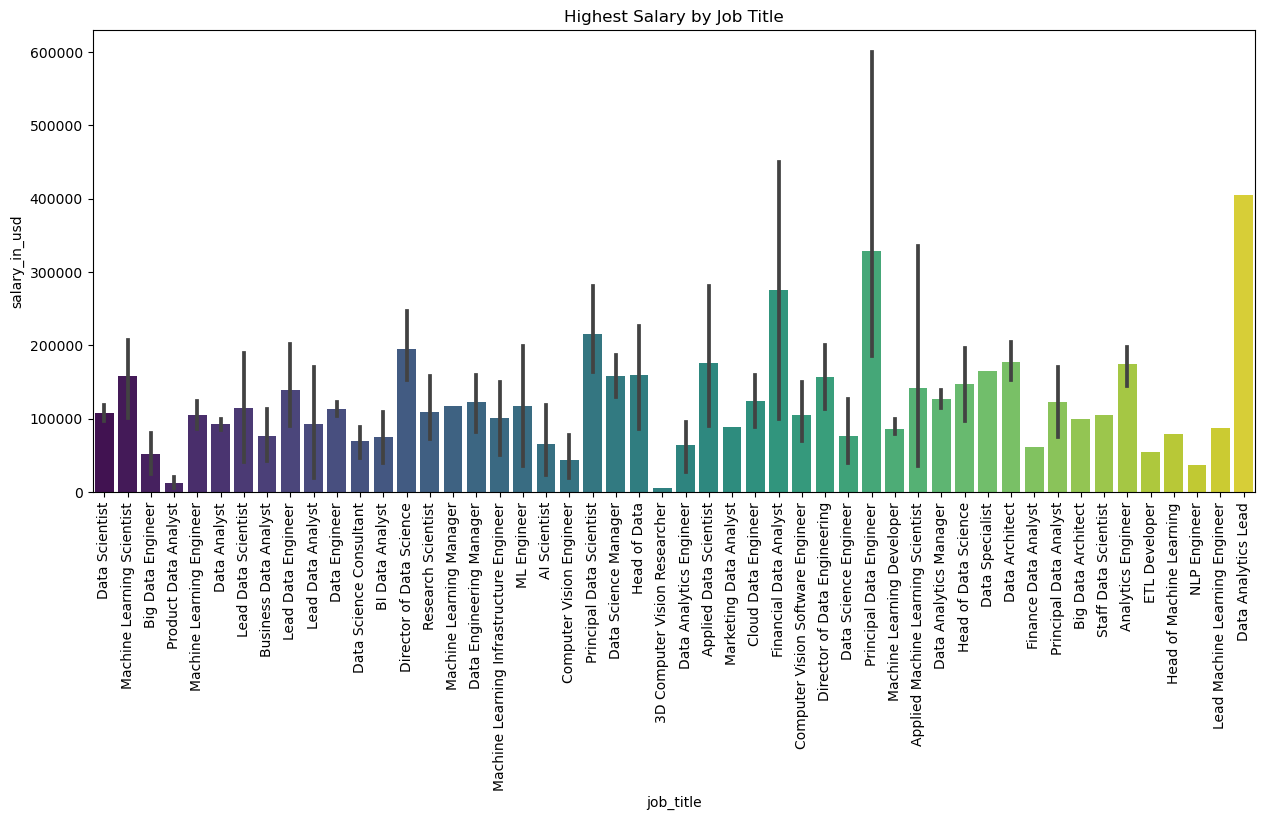

In [7]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='job_title', y='salary_in_usd', palette='viridis')
plt.title('Highest Salary by Job Title')
plt.xticks(rotation=90)
plt.show()

## Data Preparation

### 1. Remove Unnecessary Columns

**First we remove the first column (`Unnamed: 0`) which might be an index or an extra column that is not needed for analysis.**



In [8]:
# Drop the 'Unnamed: 0' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# Drop 'salary_currency' and 'salary' columns
df.drop(['salary_currency', 'salary'], axis=1, inplace=True)

In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [11]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


## Check unique values for each column in the DataFrame

In [12]:
print("Unique values in 'experience_level':")
print(df['experience_level'].unique())

print("\nUnique values in 'employment_type':")
print(df['employment_type'].unique())

print("\nUnique values in 'remote_ratio':")
print(df['remote_ratio'].unique())

print("\nUnique values in 'company_size':")
print(df['company_size'].unique())

Unique values in 'experience_level':
['MI' 'SE' 'EN' 'EX']

Unique values in 'employment_type':
['FT' 'CT' 'PT' 'FL']

Unique values in 'remote_ratio':
[  0  50 100]

Unique values in 'company_size':
['L' 'S' 'M']


## Replace feature values with more descriptive labels

In [13]:
# Mapping experience levels to more descriptive labels
df['experience_level'] = df['experience_level'].map({
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level',
    'EN': 'Entry-level'
})

In [14]:
# Mapping employment types to more descriptive labels
df['employment_type'] = df['employment_type'].map({
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [15]:
# Mapping remote ratios to more descriptive labels
df['remote_ratio'] = df['remote_ratio'].map({
    0: 'No Remote',
    50: 'Partially Remote',
    100: 'Fully Remote'
})

In [16]:
# Mapping company size to more descriptive labels
df['company_size'] = df['company_size'].map({
    'L': 'Large',
    'S': 'Small',
    'M': 'Medium'
})

In [17]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,79833,DE,No Remote,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,JP,No Remote,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,109024,GB,Partially Remote,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,HN,No Remote,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US,Partially Remote,US,Large


In [18]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [19]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"There are {duplicates_count} duplicate records.")

There are 42 duplicate records.


In [20]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [21]:
# Check the shape of the DataFrame after removing duplicates
print("Shape of data after removing duplicates:", df.shape)

Shape of data after removing duplicates: (565, 9)


In [22]:
# Univariate analysis of 'salary_in_usd'
salary_description = df['salary_in_usd'].describe()
print(salary_description)

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


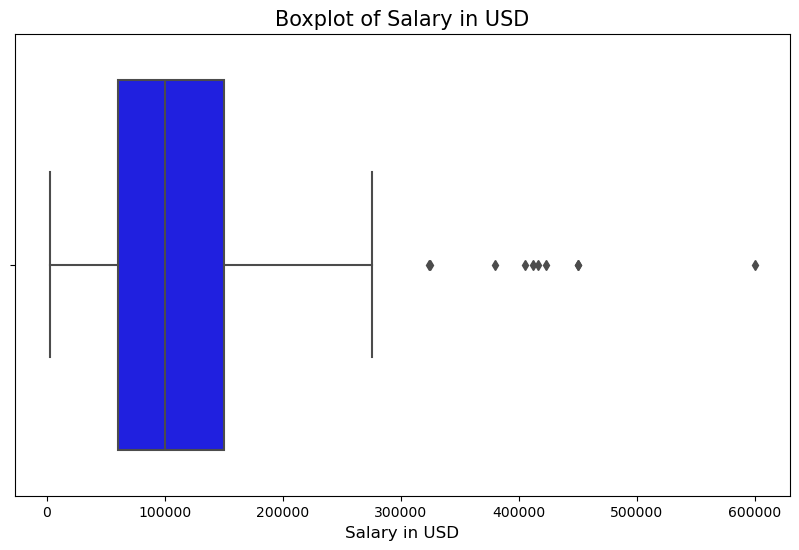

In [23]:
# Create a boxplot for 'salary_in_usd'
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x=df['salary_in_usd'], color='blue')
plt.title('Boxplot of Salary in USD', fontsize=15)
plt.xlabel('Salary in USD', fontsize=12)
plt.show()

In [24]:
# Identify records with outliers
df_outliers = df[df['salary_in_usd'] > 280000]
print("Outliers shape:", df_outliers.shape)

Outliers shape: (10, 9)


In [25]:
# Remove records with outliers
df = df[~(df['salary_in_usd'] > 280000)]
print("Shape of df after removing outliers:", df.shape)

Shape of df after removing outliers: (555, 9)


In [26]:
def count_plot(feature):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=feature, palette='dark')
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=90)
    
    # Annotate each bar with its height (count value)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = height
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')
    
    plt.show()

# Experience Level

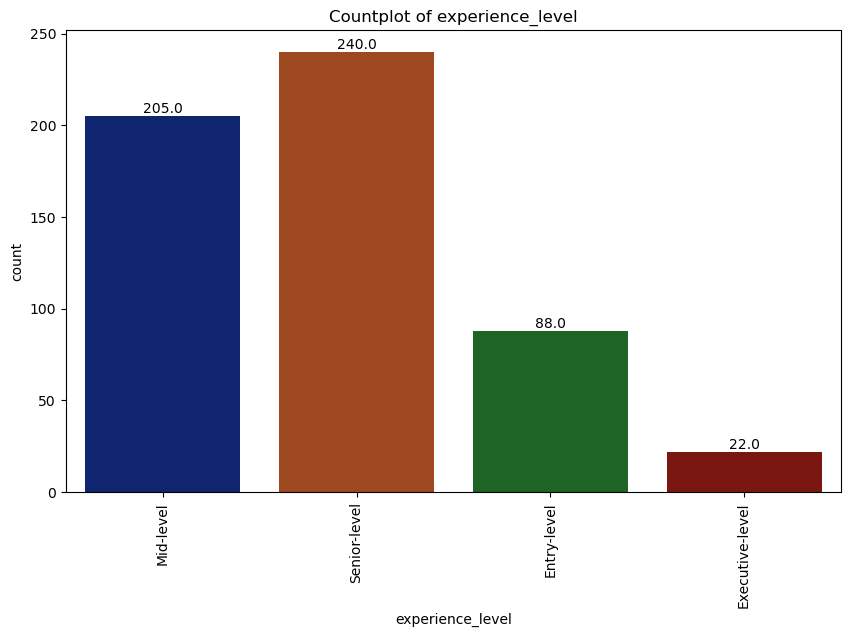

In [27]:
count_plot('experience_level')

1. Most of the records are for experience level Senior-level
2. There are very less records for experience level Executive-level

# Work Year

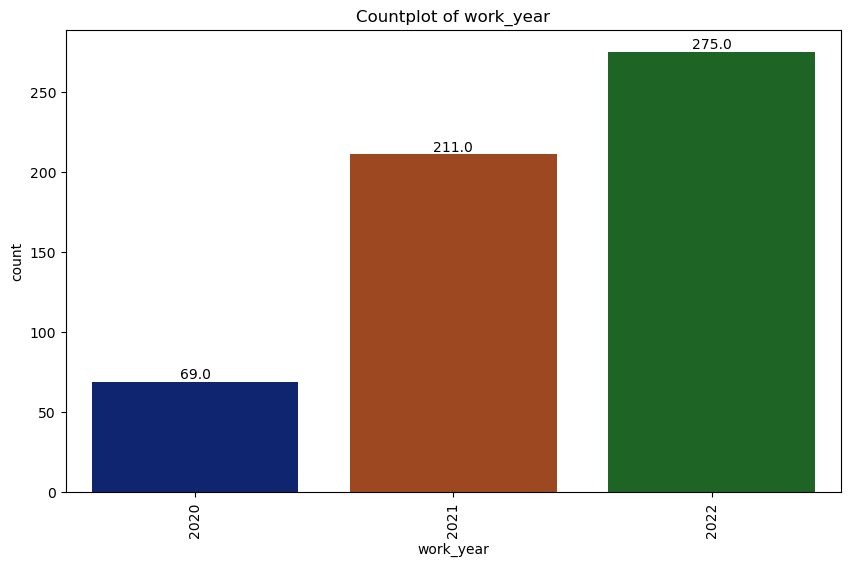

In [28]:
count_plot('work_year')

1. Most of the records in the data contains salaries for year 2022.
2. There are less records containing salary informaton for year 2020.


# Employment Type

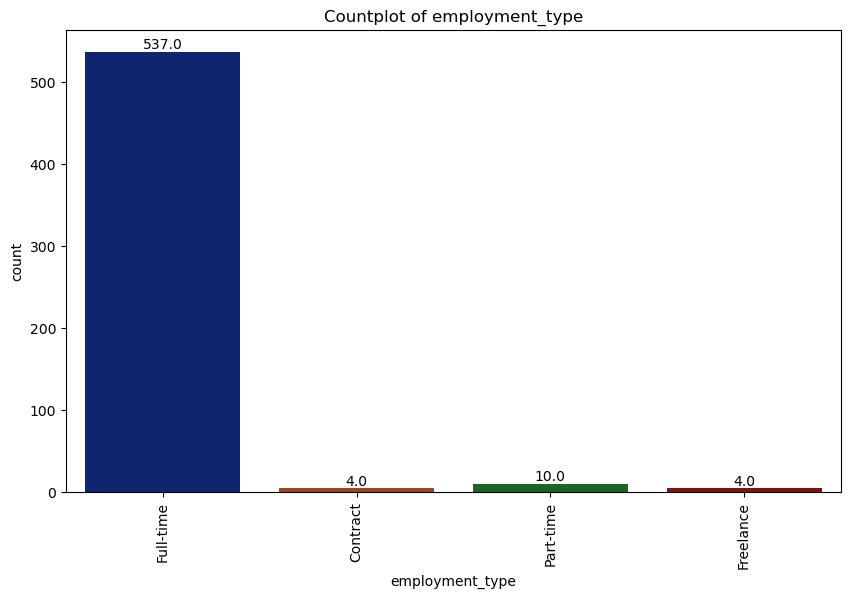

In [29]:
count_plot('employment_type')

1. Most of the records are for full time employees

# Job Title

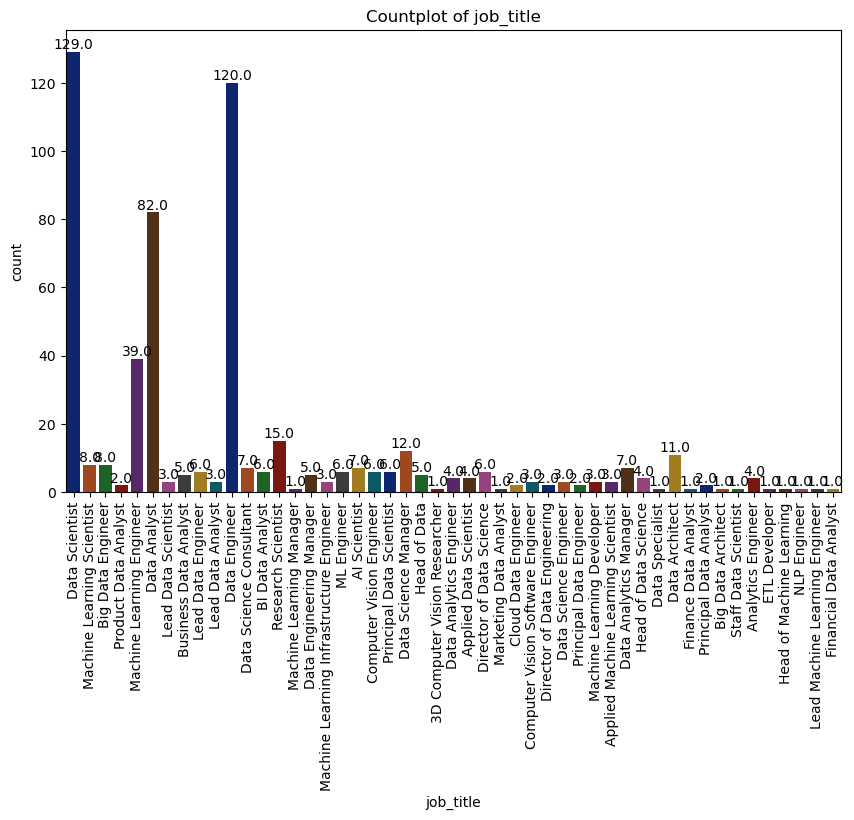

In [30]:
count_plot('job_title')

1. Most popular job titles are Data Scientist,Data Engineer, Data Analyst and Machine learning Engineer.

# Employee Residence

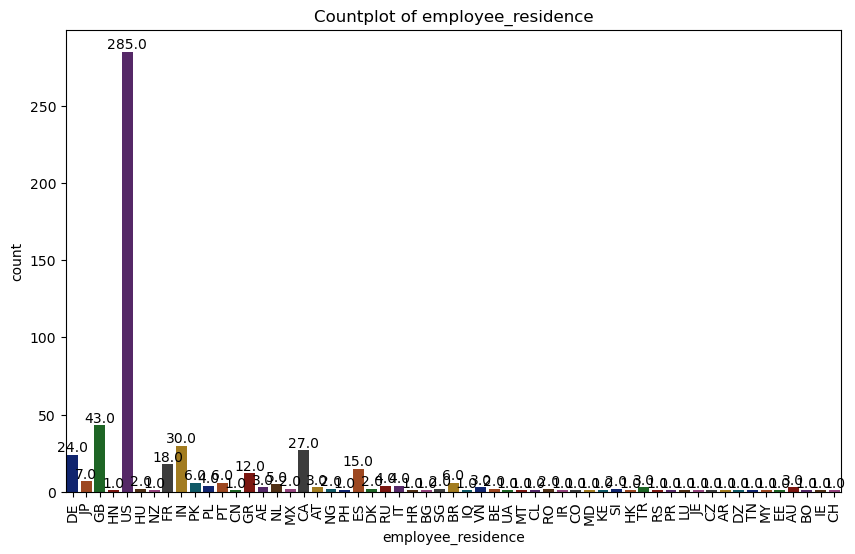

In [31]:
count_plot('employee_residence')

1. Most of the employees are from US

# Remote Ratio

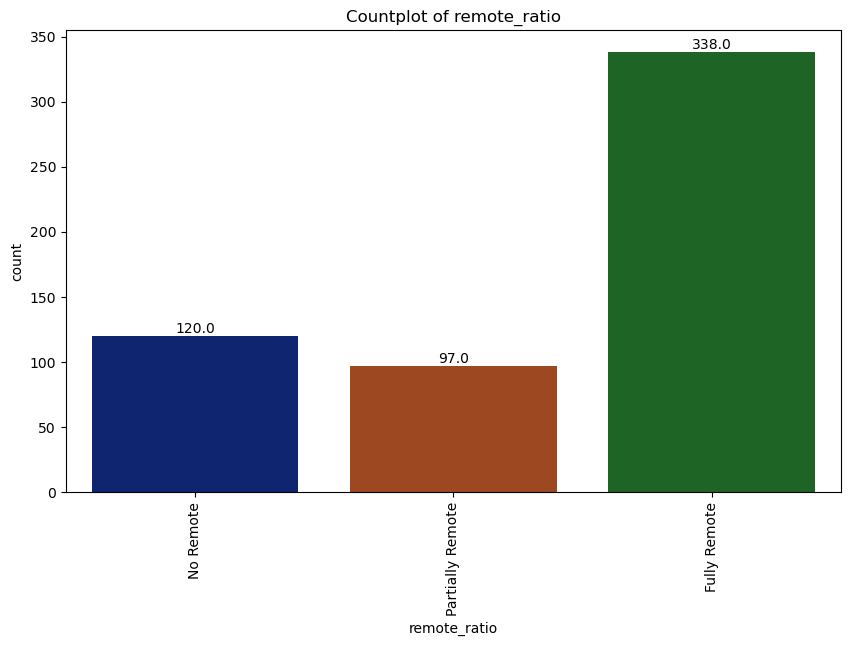

In [32]:
count_plot('remote_ratio')

1. Most emoplyees are working as fully remote

# Company Location

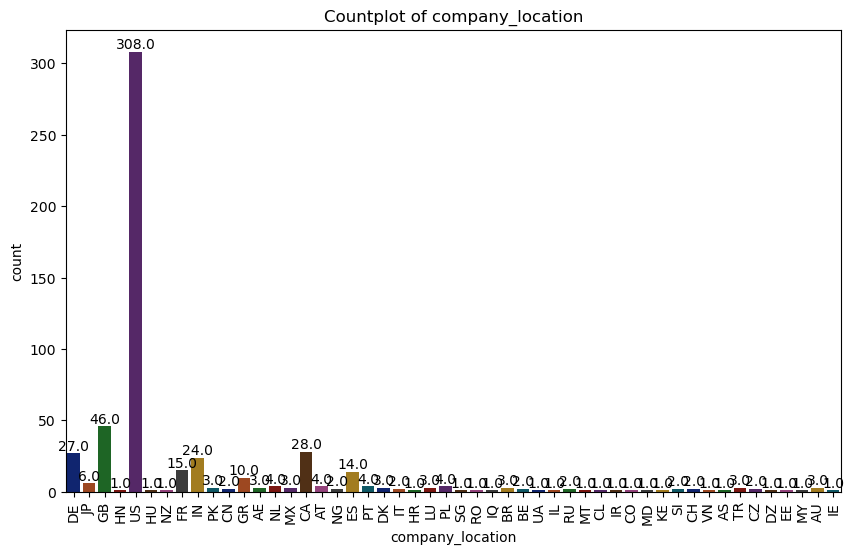

In [33]:
count_plot('company_location')

# Company Size

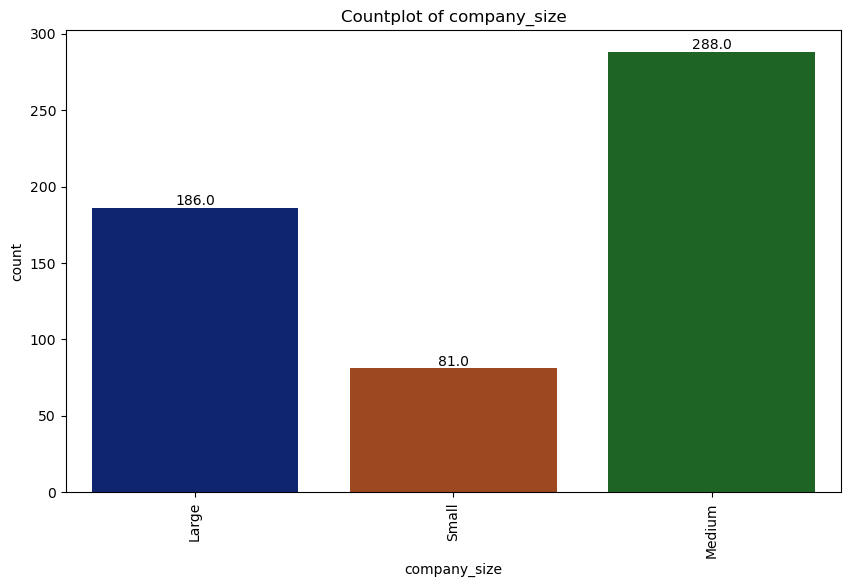

In [34]:
count_plot('company_size')

# 1. Which job title earns the highest salary?

The job title that earns the highest salary is Lead Data Engineer with a salary of $276000.00.


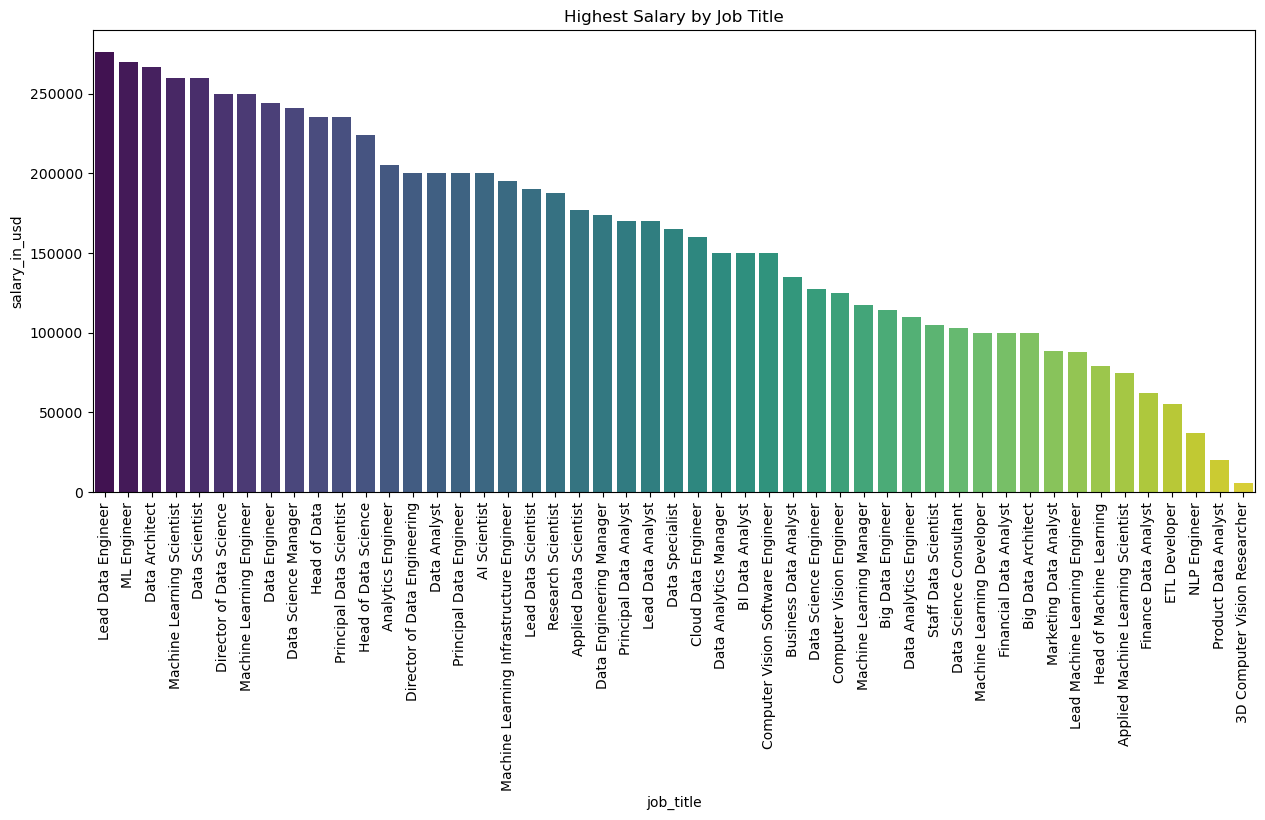

In [35]:
# Identify the highest salary job title
highest_salary_job = df.groupby('job_title')['salary_in_usd'].max().idxmax()
highest_salary = df.groupby('job_title')['salary_in_usd'].max().max()

print(f"The job title that earns the highest salary is {highest_salary_job} with a salary of ${highest_salary:.2f}.")

# Prepare the data by calculating the highest salary per job title and sorting
salary_by_job_title = df.groupby('job_title')['salary_in_usd'].max().reset_index()
salary_by_job_title = salary_by_job_title.sort_values(by='salary_in_usd', ascending=False)

# Plot the highest salary by job title
plt.figure(figsize=(15, 6))
sns.barplot(data=salary_by_job_title, x='job_title', y='salary_in_usd', palette='viridis')
plt.title('Highest Salary by Job Title')
plt.xticks(rotation=90)
plt.show()

# 2. What is the average salary for each experience level?

experience_level
Executive-level    159963.318182
Senior-level       135117.066667
Mid-level           82624.112195
Entry-level         61643.318182
Name: salary_in_usd, dtype: float64


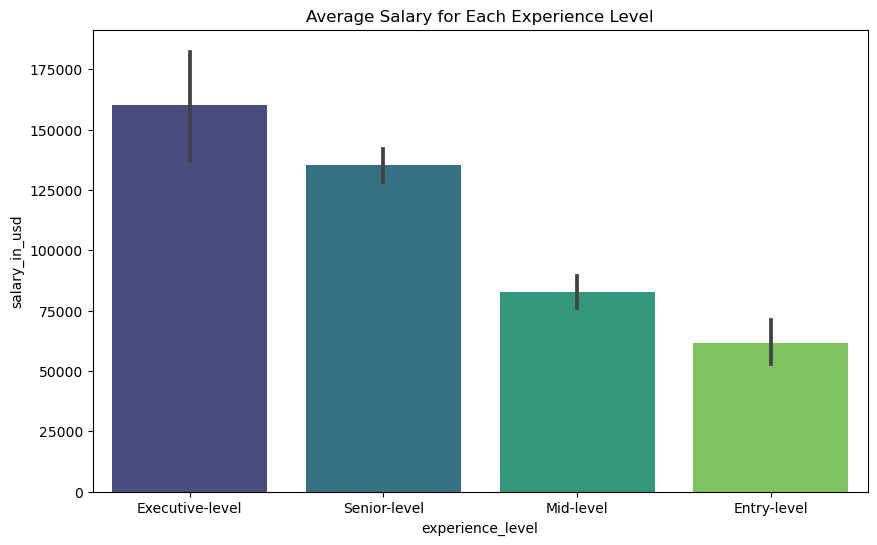

In [36]:
# Group by experience level and calculate the mean salary
avg_salary_experience_level = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
print(avg_salary_experience_level)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator=np.mean, palette='viridis' ,order=avg_salary_experience_level.index)
plt.title('Average Salary for Each Experience Level')
plt.show()

# 3. What is the average salary for company sizes: Large, Small, and Medium?

company_size
Medium    112916.850694
Large     106560.639785
Small      73697.679012
Name: salary_in_usd, dtype: float64


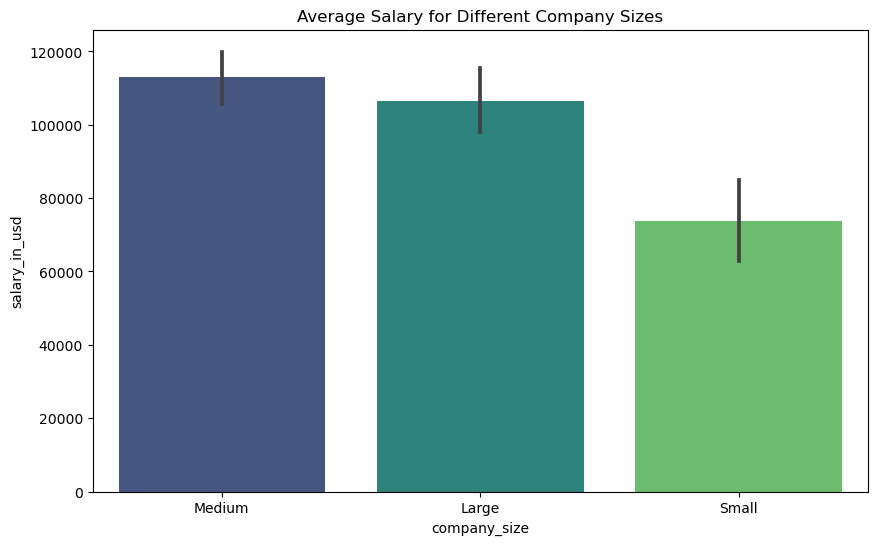

In [37]:
# Group by company size and calculate the mean salary
avg_salary_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print(avg_salary_company_size)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='company_size', y='salary_in_usd', estimator=np.mean, palette='viridis',order=avg_salary_company_size.index)
plt.title('Average Salary for Different Company Sizes')
plt.show()


# 4. Do people working full-time earn more than contract-based employees?

employment_type
Contract     126718.750000
Full-time    106667.158287
Freelance     48000.000000
Part-time     33070.500000
Name: salary_in_usd, dtype: float64


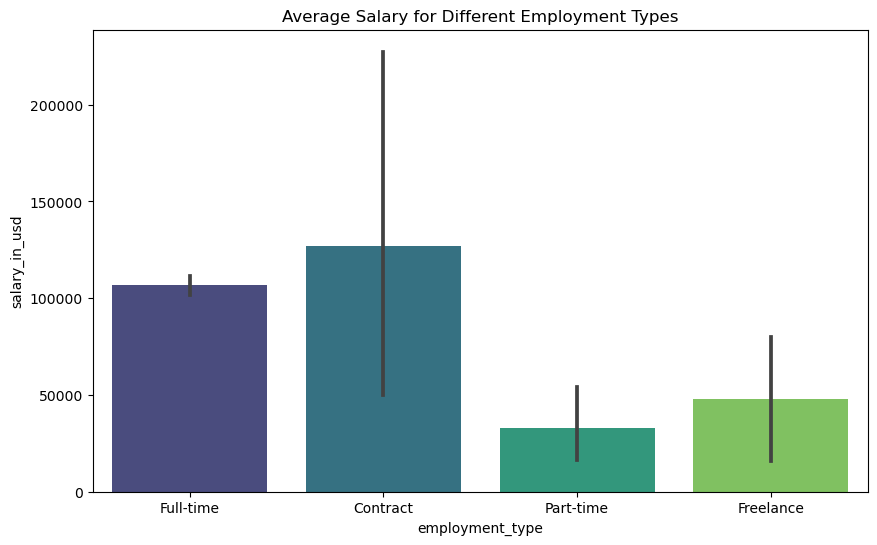

In [38]:
# Group by employment type and calculate the mean salary
avg_salary_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
print(avg_salary_employment_type)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='salary_in_usd', estimator=np.mean, palette='viridis')
plt.title('Average Salary for Different Employment Types')
plt.show()

# 5. Is the salary less for employees working remotely than for those who come to the office?

remote_ratio
Fully Remote        113822.674556
No Remote           102916.950000
Partially Remote     77193.257732
Name: salary_in_usd, dtype: float64


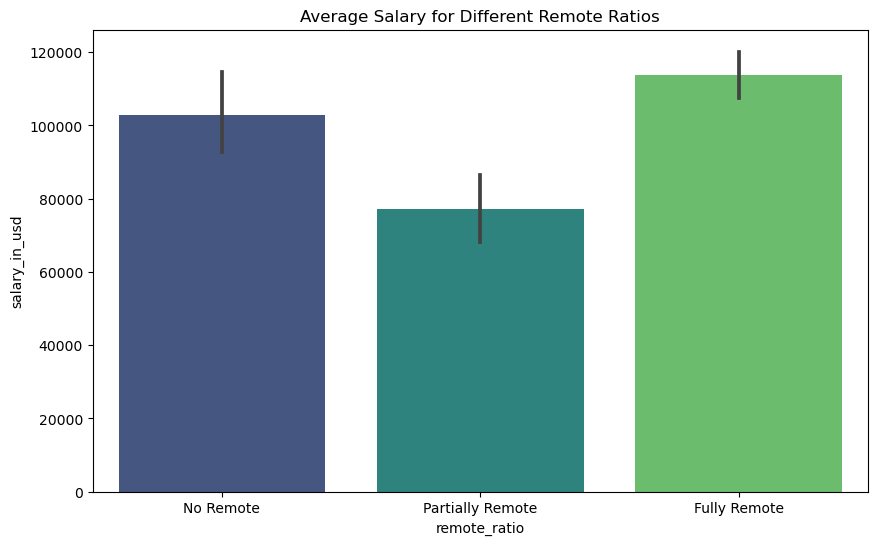

In [39]:
# Group by remote ratio and calculate the mean salary
avg_salary_remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
print(avg_salary_remote_ratio)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='remote_ratio', y='salary_in_usd', estimator=np.mean, palette='viridis')
plt.title('Average Salary for Different Remote Ratios')
plt.show()


# 6. Which country pays more to the employees?

company_location
RU    157500.000000
US    135390.168831
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
CA    100121.857143
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
Name: salary_in_usd, dtype: float64


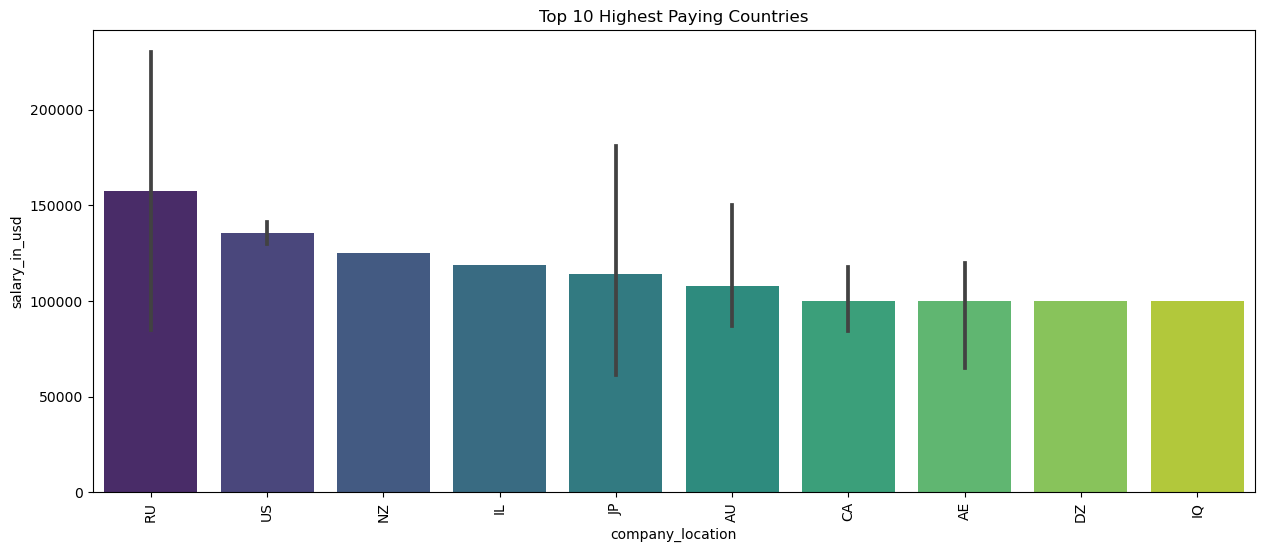

In [40]:
# Group by country and calculate the mean salary
avg_salary_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
print(avg_salary_country)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='company_location', y='salary_in_usd', estimator=np.mean, palette='viridis', order=avg_salary_country.index)
plt.title('Top 10 Highest Paying Countries')
plt.xticks(rotation=90)
plt.show()


# 7. What is the highest earning job in the highest paying countries?

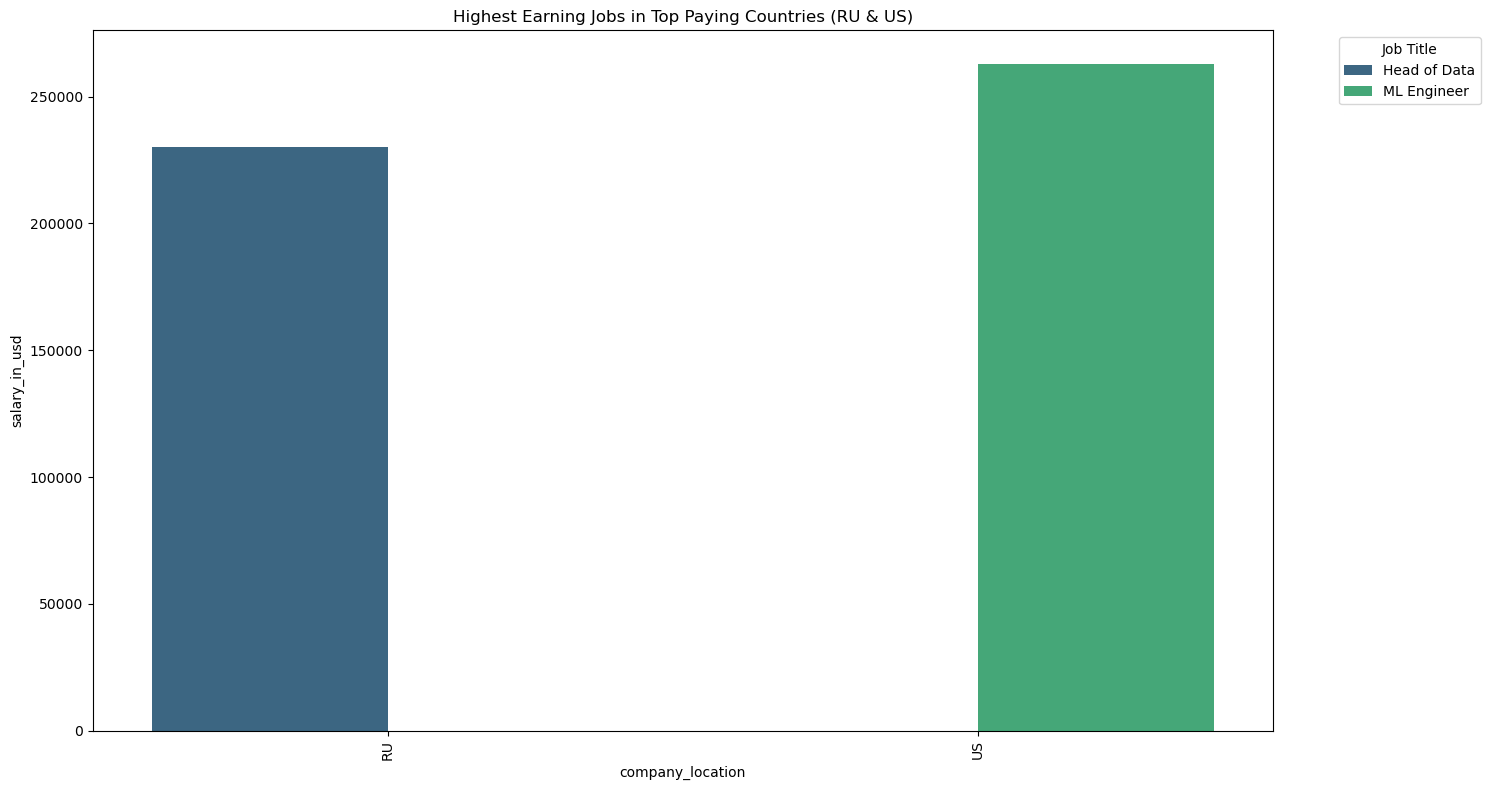

In [41]:
# Define the top two highest paying countries
top_countries = ['RU', 'US']

# Filter the data for these countries
top_country_data = df[df['company_location'].isin(top_countries)]

# Calculate mean salary by job title and country
avg_salary_by_job_and_country = top_country_data.groupby(['company_location', 'job_title'])['salary_in_usd'].mean().reset_index()

# Find the highest earning job in each country
highest_earning_jobs = avg_salary_by_job_and_country.loc[avg_salary_by_job_and_country.groupby('company_location')['salary_in_usd'].idxmax()]

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=highest_earning_jobs, x='company_location', y='salary_in_usd', hue='job_title', palette='viridis')
plt.title('Highest Earning Jobs in Top Paying Countries (RU & US)')
plt.xticks(rotation=90)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust plot to fit all elements
plt.show()


# 8. What are the highest earning job titles working at expert level?

Top 10 highest earning job titles at expert level:
job_title
Head of Data                232500.000000
Data Engineer               219333.333333
Director of Data Science    174503.600000
Head of Data Science        158958.333333
Analytics Engineer          155000.000000
BI Data Analyst             150000.000000
Data Analyst                120000.000000
Lead Data Engineer          118187.000000
Data Engineering Manager     79833.000000
Head of Machine Learning     79039.000000
Name: salary_in_usd, dtype: float64


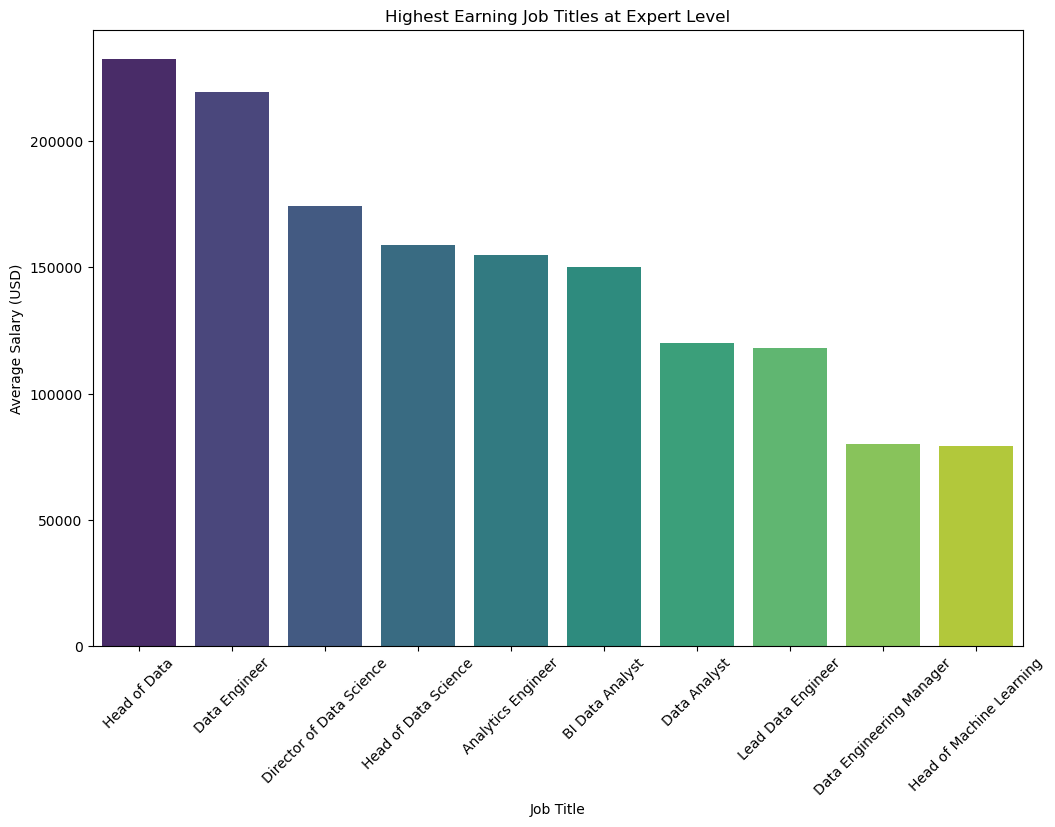

In [42]:
# Filter data for expert level roles
data_expert = df[df['experience_level'] == 'Executive-level']

# Calculate the average salary for each job title
highest_earning_jobs_expert = data_expert.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the top 10 highest earning job titles
print("Top 10 highest earning job titles at expert level:")
print(highest_earning_jobs_expert.head(10))

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=highest_earning_jobs_expert.head(10).index, y=highest_earning_jobs_expert.head(10).values, palette='viridis')
plt.title('Highest Earning Job Titles at Expert Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# 9. What are the highest earning job titles working at senior level?

Top 10 highest earning job titles at senior level:
job_title
ML Engineer                                 256000.000000
Machine Learning Scientist                  201666.666667
Machine Learning Infrastructure Engineer    195000.000000
Analytics Engineer                          195000.000000
Principal Data Engineer                     192500.000000
Principal Data Scientist                    187939.400000
Data Architect                              182076.625000
Applied Data Scientist                      177000.000000
Lead Data Analyst                           170000.000000
Principal Data Analyst                      170000.000000
Name: salary_in_usd, dtype: float64


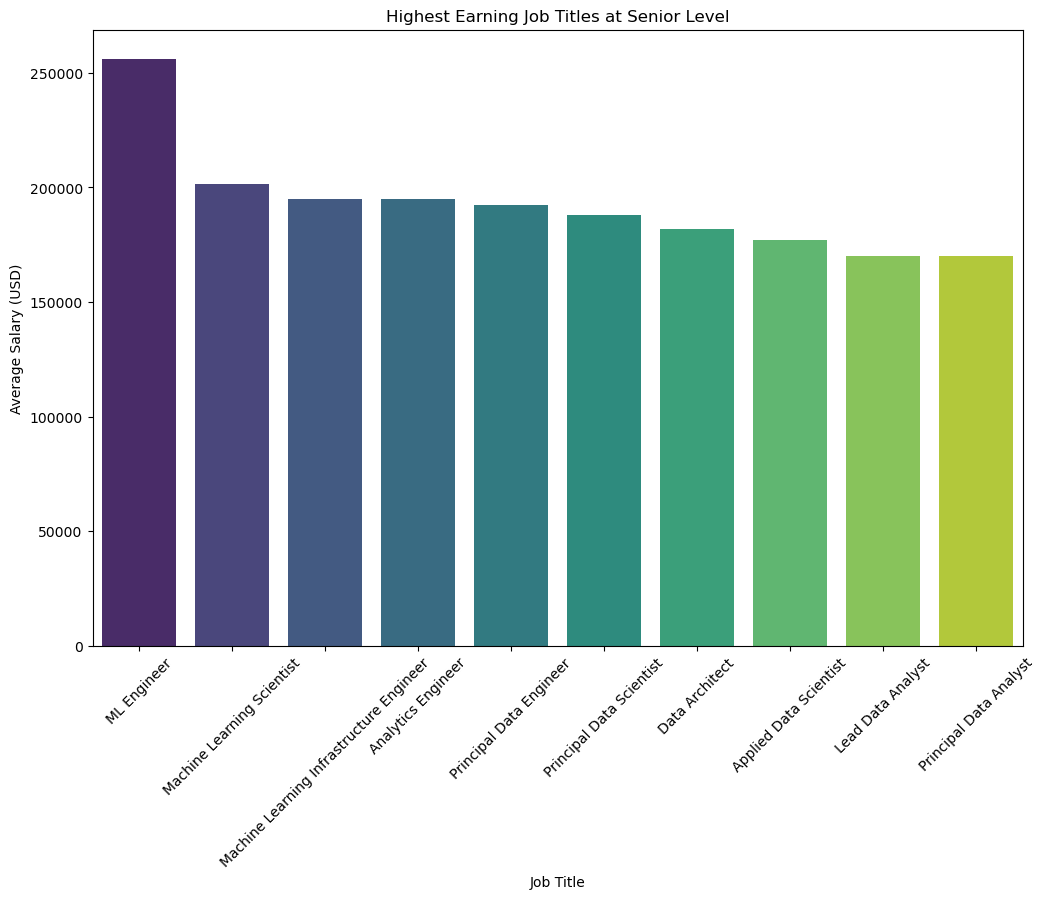

In [43]:
# Filter data for senior level roles
data_senior = df[df['experience_level'] == 'Senior-level']

# Calculate the average salary for each job title
highest_earning_jobs_senior = data_senior.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the top 10 highest earning job titles
print("Top 10 highest earning job titles at senior level:")
print(highest_earning_jobs_senior.head(10))

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=highest_earning_jobs_senior.head(10).index, y=highest_earning_jobs_senior.head(10).values, palette='viridis')
plt.title('Highest Earning Job Titles at Senior Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# 10. Has the salary of data science job roles increased over the passing years?

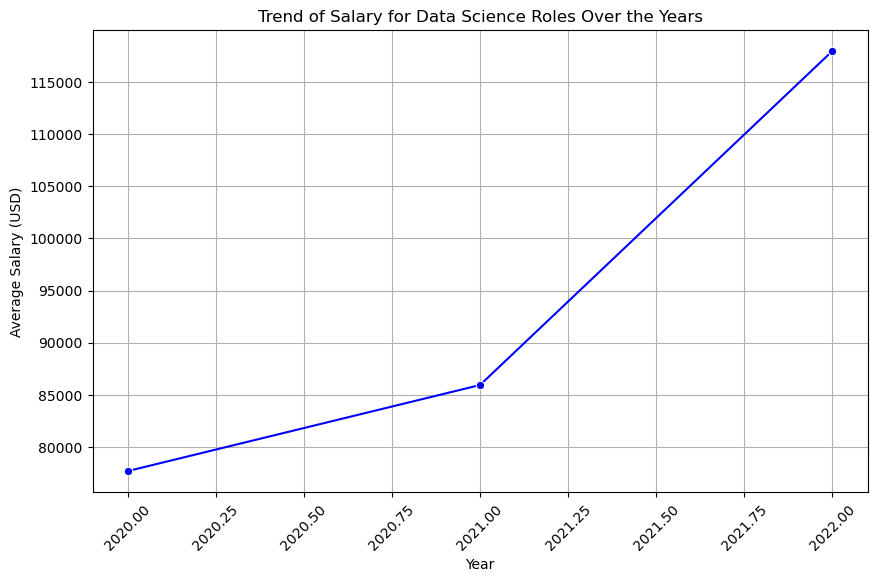

In [44]:
# Filter data for data science roles
data_data_science = df[df['job_title'].str.contains('Data Scientist|Data Analyst|Data Engineer')]

# Group by year and calculate the average salary
salary_trend_data_science = data_data_science.groupby('work_year')['salary_in_usd'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=salary_trend_data_science.index, y=salary_trend_data_science.values, marker='o', color='blue')
plt.title('Trend of Salary for Data Science Roles Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 11. What is the trend of salary paid by medium size company over the passing years ?

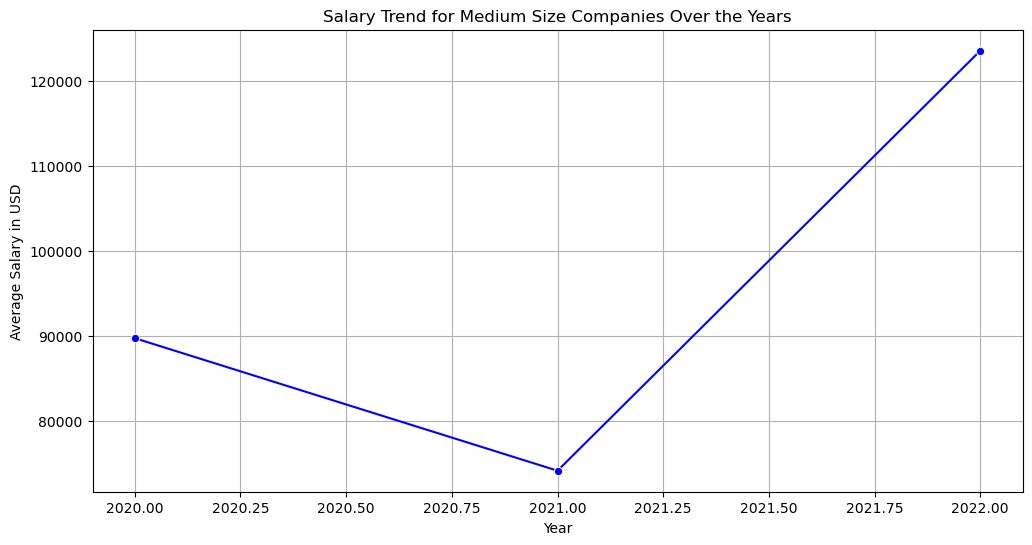

In [45]:
# Filter data for medium size companies
data_medium = df[df['company_size'] == 'Medium']

# Group by year and calculate the mean salary
salary_trend_medium = data_medium.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plot salary trend for medium size companies
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_trend_medium, marker='o', color='blue')
plt.title('Salary Trend for Medium Size Companies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()

# 12. What is the trend of salaries paid by large size companies over the passing years ?

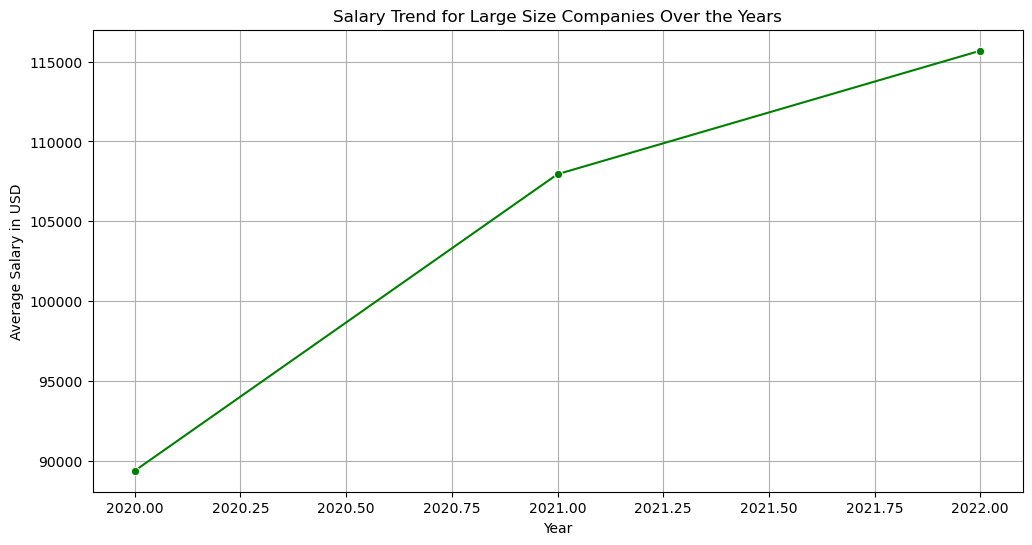

In [46]:
# Filter data for large size companies
data_large = df[df['company_size'] == 'Large']

# Group by year and calculate the mean salary
salary_trend_large = data_large.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plot salary trend for large size companies
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_trend_large, marker='o', color='green')
plt.title('Salary Trend for Large Size Companies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


# 13. What is the trend of salaries paid by small size companies over the passing years ?

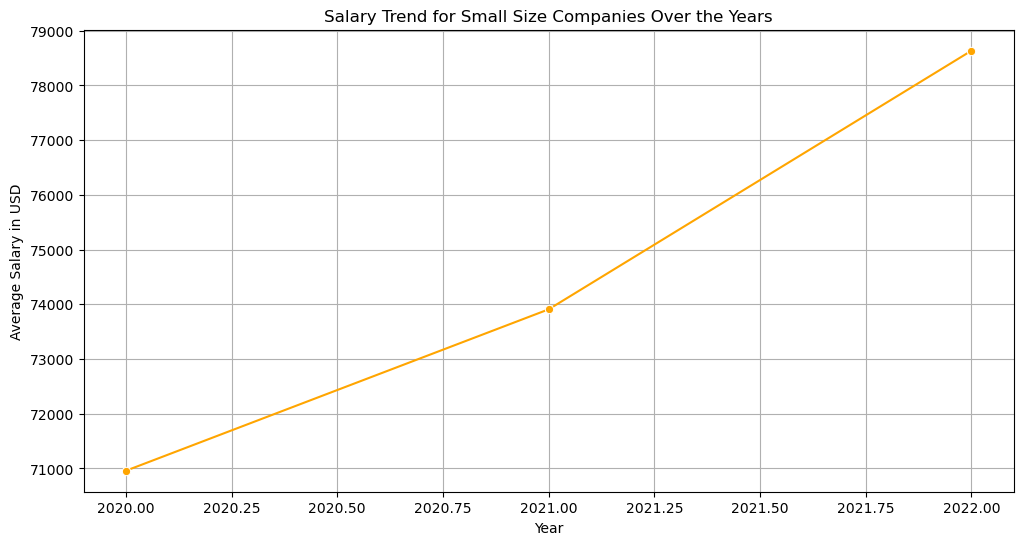

In [47]:
# Filter data for small size companies
data_small = df[df['company_size'] == 'Small']

# Group by year and calculate the mean salary
salary_trend_small = data_small.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plot salary trend for small size companies
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_trend_small, marker='o', color='orange')
plt.title('Salary Trend for Small Size Companies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


In [48]:
#Save the DataFrame to a CSV file
#df.to_csv('Transformed_Salary_data.csv')

In [49]:
# Save the DataFrame to a CSV file
#df.to_csv('Transformed_ds_Salary_data.csv', index=False)